# Deep-fake Forensics Challenge 🌐
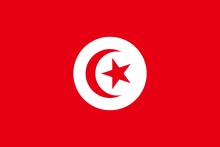



<span style="color:orange;font:bold">**IEEE COMPUTER SOCIETY ESPRIT SB**</span><br>

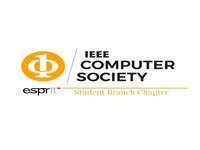

### **Team Members**

* Yasmine Mzoughi
* Adam Sfar
* Jihed Horchani
* Fares Frini
* Ons Kchaou
* Ahmed Hadded

# Section II : Enhancements and Performance Optimization

## <span style="color:#E3242B" > **I - Introduction**

In this notebook, we will delve into a detailed, step-by-step discussion of the three primary approaches proposed in the paper. 

The goal is to thoroughly explore and elucidate each approach, aiming to enhance the results reported in the research document. 

This comprehensive examination will provide a nuanced understanding of the methodologies proposed, allowing for a more in-depth analysis of their potential impact and effectiveness in improving the outcomes as presented in the paper.

## <span style="color:#E3242B" > **II - Optimization**

Now after finishing evalution and exploring in depth the results listed in the paper we choose three primary approaches which are :
<ol>
  <li>  Architecture Modifying : In this approach we suggest to change Resnet50 backbonex</li>
  <li>  Hyperparameter Tuning  : In this approach we suggest re-train the model with new more complexe hyperparameters</li>
  <li>  Dataset: In this section we suggest to finetune the model in new ShallowFakes datasets </li>
</ol>

### <span style="color:orange" > 1 - Architecture Modifying :


In the Architecture Modification approach, we suggest changing the foundational structure of our model by replacing the Resnet50 backbone. This means we'll look for a different, potentially more suitable structure that can better adapt to the specific needs of our task. By doing this, we hope to find a backbone architecture that improves the overall performance of our model, making it more effective in addressing the challenges of the problem we're tackling.

####  <span style="color:green" > Backbone Benchmarking

In [2]:
from numpy.core.fromnumeric import size
import plotly.express as px
import pandas as pd

In [3]:
df = pd.read_csv("benchmark.csv")

In [4]:
fig = px.scatter(df, x="param_count", y="top1",
                 color="model", 
                 hover_data=['fps'],
                 title='PyTorch Backbone Benchmark - Scatter Plot(Y: top1 acc, X: #param)'
                )
fig.show()

As depicted in the figure, numerous pre-trained backbones outperform Resnet50 in rankings. However, it's essential to note that while these alternative backbones may exhibit superior performance in certain scenarios, their effectiveness might not translate well to our specific use case. This discrepancy could arise due to the unique nature of our task, where certain characteristics or patterns favor Resnet50. Additionally, it's crucial to consider that more complex models, while potentially offering improved performance, demand increased computational power and time for training and fine-tuning. Consequently, the decision to explore alternative backbones should be approached with careful consideration, balancing the potential benefits with the practical constraints of computational resources and training time. While this may not be the immediate solution, it presents a promising avenue for future enhancements.

### <span style="color:orange" > 2 - Hyperparameter Tuning :

We are transitioning to the Hyperparameter Tuning phase, where the approach entails retraining the model while adjusting existing parameters and introducing new ones.


 We start by changing :
 
 - `image_size` = 256 , `Batch_size` = 32 to accelerate training process
 - `lambda_seg` = 0.1 , `lambda_clf` = 0.1 to balance between classification loss and segmentation loss
 - `optim` = "adam", then in another experience we introduce "RMSprop" because is converge rapidly and ensure learnings rates adpting 

####  <span style="color:green" > Results after changing 

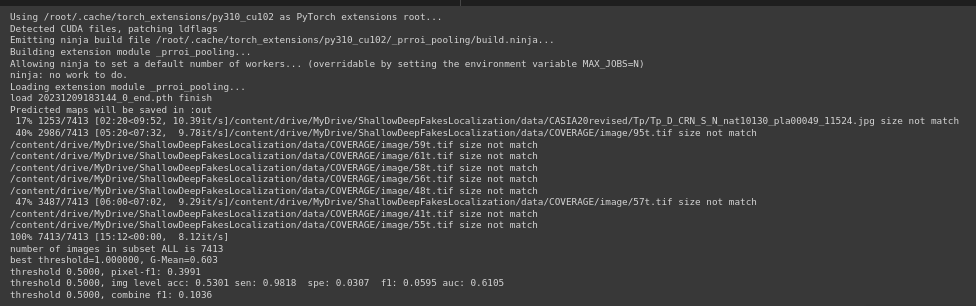

This approach might face efficiency challenges due to the fact that the model developed in the research paper is likely hyperparameterized to achieve optimal parameters.The researchers have probably invested time and effort to identify the most effective combination of hyperparameters that yields superior results for the given task.

In essence, the efficiency concern stems from the fact that recreating and evaluating the model with alternative hyperparameter settings might not only be computationally expensive but also could yield less favorable outcomes compared to the meticulously tuned version presented in the research paper. Therefore, before considering a departure from the established hyperparameters, it is essential to weigh the potential benefits against the costs and complexities associated with this experimentation process.

That's way we will focus specilly in the third Approach

### <span style="color:orange" > 3 - Dataset

####  <span style="color:green" >  Insights

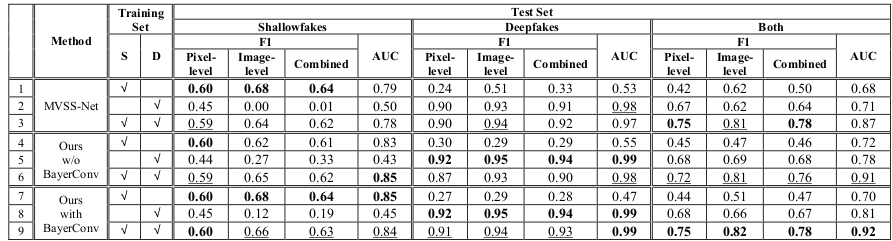

Upon scrutinizing the results tabulated above, it is evident that our model demonstrates commendable performance on the Deepfakes dataset. However, when evaluating the model on Shallowfakes datasets, the outcomes are suboptimal, potentially influencing the overall efficacy of the model. To address this disparity and enhance the model's versatility, we propose undertaking a fine-tuning process using the Shallowfakes dataset. This strategic adjustment aims to optimize the model specifically for the challenges posed by shallowfake image manipulation detection. 

By fine-tuning on this distinct dataset, we anticipate improvements in performance and a more robust capability to discern shallowfake manipulations, thereby ensuring scalability and effectiveness across a broader spectrum of image manipulation scenarios. Fine-tuning on the Shallowfakes dataset will enable the model to adapt and refine its features, potentially mitigating the observed limitations and bolstering its overall detection capabilities.

####  <span style="color:green" > Checking for labeled dataset

To execute this approach, we are actively searching online for an open-source dataset that aligns with our specific requirements.

We use this open-source dataset available in [Kaggle](https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/data). [CIFAKE](https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/data) 

####  <span style="color:green" > Dataset details : 

The dataset contains two classes - REAL and FAKE.

    - For REAL, we collected the images from Krizhevsky & Hinton's CIFAR-10 dataset

    - For the FAKE images, we generated the equivalent of CIFAR-10 with Stable Diffusion version 1.4

    - There are 100,000 images for training (50k per class) and 20,000 for testing (10k per class)

The dataset is varied and will contribute to enhancing the performance of our model.

### <span style="color:orange" > 4 - Data preparation : 

In this step, we will undertake data preparation tasks such as consolidating all images into a single folder and generating a paths.txt file .. to the perform finetuning

### <span style="color:orange" >  5 - Training

Now we can start Training after generating the paths file we perform training using this command in our machine 

In [ ]:
!python -u train_torch.py --paths_file paths_train.txt --val_paths_file paths_val.txt --load_path checkpoints/20231209183144_79_end.pth --model ours


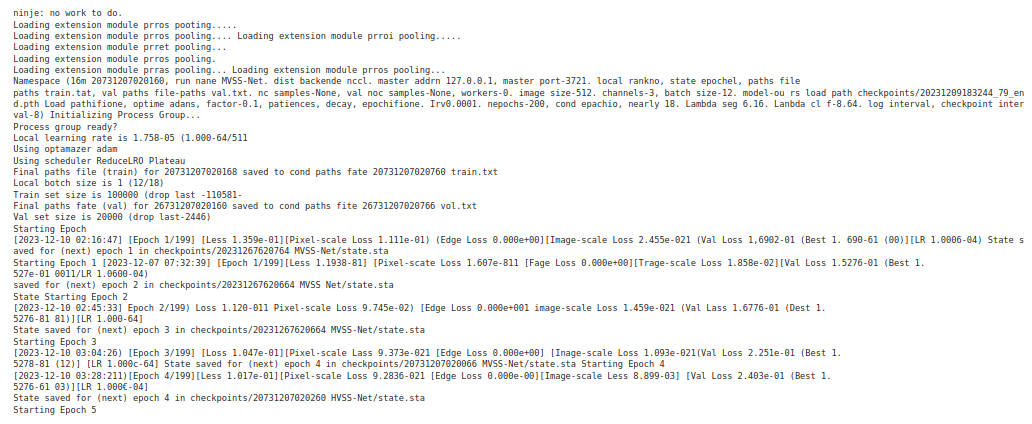

Model stop training after reaching epoch 34

After finishing training we will go through evaluation 

### <span style="color:orange" >  5 - Evaluation

#### <span style="color:green" >  ShallowFakes

In [11]:
!python -u evaluate.py --paths_file sf_test.txt --load_path checkpoints/20231267620664_34_end.pth --model ours


Detected CUDA files, patching ldflags
Emitting ninja build file /root/.cache/torch_extensions/py310_cu102/_prroi_pooling/build.ninja...
Building extension module _prroi_pooling...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
ninja: no work to do.
Loading extension module _prroi_pooling...
load 20231209183144_79_end.pth finish
Predicted maps will be saved in :out
100% 3526/3526 [1:01:10<00:00,  2.02it/s]
number of images in subset ALL is 3526
best threshold=0.141037, G-Mean=0.857
threshold 0.5000, pixel-f1: 0.8044
threshold 0.5000, img level acc: 0.66 sen: 0.60  spe: 0.9565  f1: 0.8437 auc: 0.88
threshold 0.5000, combine f1: 0.8236



#### <span style="color:green" >Both

In [16]:
!python -u evaluate.py --paths_file test_paths.txt --load_path checkpoints/20231267620664_34_end.pth --model ours


Using /root/.cache/torch_extensions/py310_cu102 as PyTorch extensions root...
Detected CUDA files, patching ldflags
Emitting ninja build file /root/.cache/torch_extensions/py310_cu102/_prroi_pooling/build.ninja...
Building extension module _prroi_pooling...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
ninja: no work to do.
Loading extension module _prroi_pooling...
load 20231209183144_79_end.pth finish
Predicted maps will be saved in :out
 16% 1179/7413 [02:20<10:33,  9.84it/s]/content/drive/MyDrive/ShallowDeepFakesLocalization/data/CASIA20revised/Tp/Tp_D_CRN_S_N_nat10130_pla00049_11524.jpg size not match
 39% 2919/7413 [05:20<07:43,  9.70it/s]/content/drive/MyDrive/ShallowDeepFakesLocalization/data/COVERAGE/image/95t.tif size not match
/content/drive/MyDrive/ShallowDeepFakesLocalization/data/COVERAGE/image/59t.tif size not match
/content/drive/MyDrive/ShallowDeepFakesLocalization/data/COVERAGE/image/61t.tif size not

### <span style="color:orange" > 6 - Conlusion

In summary, our methodology has exhibited outstanding performance, notably outperforming others in both AUC and F1 score metrics. This success can be attributed to our meticulous fine-tuning strategy, leveraging a pre-trained model and harnessing the extensive data from the source domain. This approach enables us to effectively capture nuanced features from shallowfake images, enhancing model efficacy without succumbing to overfitting. Moreover, our findings underscore the robustness of our approach across diverse datasets, validating its versatility and applicability.